# Данные были взяты из конкурса «Data Fusion Contest 2025 - Задача 1 "Label Craft"» на 2 миллиона рублей.

Ссылка: https://ods.ai/competitions/data-fusion2025-labelcraft

# О данных


Размеченные данные о товарах (labeled_train.parquet)

Основная информация о товарах, включая их размеченную категорию:

hash_id – Идентификатор товара

source_name — Название товара

attributes – Атрибуты товара

cat_id – Целевая категория товара

# Цель

Целью данного проекта является построение эффективной модели машинного обучения для классификации товаров по категориям.




# Этапы выполнения проекта

Работа над проектом охватывала полный цикл задач, начиная от анализа и предварительной обработки исходных ("сырых") данных и заканчивая обучением и оценкой итоговой модели. Процесс включал следующие основные этапы:

    1) Загрузка данных: Получение исходных наборов данных.
    2) Обработка данных:
        2.1. Удаление неинформативных признаков
        2.2. Объединение информации из схожих источников и агрегация схожих записей.
        2.3. Переименование столбцов для приведения к единому стандарту или для улучшения читаемости.
        2.4. Очистка и стандартизация данных.
        2.5. Удаление дубликатов записей.
        2.6. Обработка пропусков.
    3) Исследовательский анализ данных.
    4) Подготовка данных для моделирования.
    5) Построение модели.
    6) Оценка качества модели.
    7) Заключение.

# Результат

    RandomForest:
Точность (Accuracy): 0.7714                                                                                                                                                                                             
Взвешенная F1-мера (Weighted F1-score): 0.7725                                                                                                                                                                            
Макро-F1-мера (Macro F1-score): 0.7522                                                                                                                                                                                  

    XGBoost:
Точность (Accuracy): 0.8197                                                                                                                                                                                             
Взвешенная F1-мера (Weighted F1-score): 0.8208                                                                                                                                                                          
Макро-F1-мера (Macro F1-score): 0.8064                                                                                                                                                                                  

    k-NN:
Точность (Accuracy): 0.5740                                                                                                                                                                                             
Взвешенная F1-мера (Weighted F1-score): 0.5782                                                                                                                                                                          
Макро-F1-мера (Macro F1-score): 0.5417                                                                                                                                                                                  

# Обратите внимание

Первоначально я планировал использовать мощь LLM-модели для интеллектуальной обработки и обогащения данных. Идея заключалась в том, чтобы с помощью анализа существующих столбцов извлечь необходимую информацию непосредственно из контекста некоторых столбцов.

Однако, учитывая ограниченные вычислительные ресурсы моего ноутбука, я вынужден адаптировать подход и реализовать решение в рамках доступных возможностей.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 40) # изменяем max показ колонок до 40
pd.set_option('display.max_colwidth', None) # Чтобы увидеть значение полностю

In [2]:
df_lab = pd.read_parquet("C:/Users/user/Downloads/labeled_train.parquet")
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716552 entries, 0 to 716551
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   hash_id      716552 non-null  object
 1   source_name  716552 non-null  object
 2   attributes   716552 non-null  object
 3   cat_id       716552 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 19.1+ MB


In [3]:
df_lab.isna().sum() # Анализ пропущенных значений

hash_id        0
source_name    0
attributes     0
cat_id         0
dtype: int64

In [4]:
df_lab.head(1)

,hash_id,source_name,attributes,cat_id
0,00002c14676b6a5c02d01fd82a92bd50,"Бойник барабана для стиральной машины Candy, Vestel, Bompani, Whirlpool","[{""""attribute_id"""":8,""""attribute_name"""":""""Поставщик"""",""""attribute_value"""":""""Нет бренда""""},{""""attribute_id"""":14,""""attribute_name"""":""""Возможность самовывоза"""",""""attribute_value"""":""""Да""""},{""""attribute_id"""":15,""""attribute_name"""":""""Возможность доставки"""",""""attribute_value"""":""""Нет""""},{""""attribute_id"""":45,""""attribute_name"""":""""Гарантия"""",""""attribute_value"""":""""Нет""""},{""""attribute_id"""":49,""""attribute_name"""":""""Страна"""",""""attribute_value"""":""""Турция""""},{""""attribute_id"""":52,""""attribute_name"""":""""Вес"""",""""attribute_measure"""":""""грамм"""",""""attribute_value"""":""""100""""},{""""attribute_id"""":96,""""attribute_name"""":""""Материал"""",""""attribute_value"""":""""Пластик""""},{""""attribute_id"""":482,""""attribute_name"""":""""Размер"""",""""attribute_value"""":""""Длина 18 Ширина 5 Высота 5""""},{""""attribute_id"""":11740,""""attribute_name"""":""""Ширина упаковки"""",""""attribute_measure"""":""""сантиметр"""",""""attribute_value"""":""""5""""},{""""attribute_id"""":11742,""""attribute_name"""":""""Высота упаковки"""",""""attribute_measure"""":""""сантиметр"""",""""attribute_value"""":""""5""""},{""""attribute_id"""":12335,""""attribute_name"""":""""В наличии"""",""""attribute_value"""":""""Да""""},{""""attribute_id"""":12405,""""attribute_name"""":""""Ebsmstock"""",""""attribute_value"""":""""Нет""""},{""""attribute_id"""":12406,""""attribute_name"""":""""Модель устройства"""",""""attribute_value"""":""""КХ-0012297""""},{""""attribute_id"""":12407,""""attribute_name"""":""""Название"""",""""attribute_value"""":""""Бойник барабана для стиральной машины Candy, Vestel, Bompani, Whirlpool""""},{""""attribute_id"""":12411,""""attribute_name"""":""""Глубина упаковки"""",""""attribute_measure"""":""""сантиметр"""",""""attribute_value"""":""""18""""}]",10501


В колонке 'атрибуты' значения представлены в формате, похожем на JSON, но с некорректными кавычками.

In [5]:
df_lab.loc[:,'attributes'] =  df_lab.loc[:,'attributes'].str.replace('""', '"') # Заменяем кавычки

In [6]:
import json

In [7]:
# Функция для преобразования JSON в словарь
def unpack_attributes(json_str):
    try:
        attributes = json.loads(json_str)  # Разбираем JSON
        return {attr.get("attribute_name", f"unknown_{attr.get('attribute_id', 'id')}"): 
                attr.get("attribute_value", None) for attr in attributes}
    except json.JSONDecodeError:
        return {}  # Если ошибка декодирования, вернем пустой словарь

# Разворачиваем JSON-данные в новые колонки
df_expanded = df_lab['attributes'].apply(lambda x: pd.Series(unpack_attributes(x)))

In [8]:
# Объединяем с исходным DataFrame
df_lab1 = pd.concat([df_lab.drop('attributes', axis=1), df_expanded], axis=1)

In [9]:
df_lab1.head(1)

,hash_id,source_name,cat_id,Поставщик,Возможность самовывоза,Возможность доставки,Гарантия,Страна,Вес,Материал,Размер,Ширина упаковки,Высота упаковки,В наличии,Ebsmstock,Модель устройства,Название,Глубина упаковки,Максимальная мощность,Максимальная глубина погружения,...,Толщина столешницы от,Варочная панель,Нагрев с одной стороны,Решетка для гриля,Противень для выпекания,Фильтр hepa,Емкость контейнера,"Режим ""дожаривание""",Микроволны+гриль+конвекция,Режим подогрева,Регулировка температуры кофе,Включение и выключение по расписанию,Мониторинг энергопотребления,Бессрочный,Версия издания,Утапливаемые ручки управления,"Количество в упаковке, шт.",Воздушный поток,Тип коннектора,Прямой привод
0,00002c14676b6a5c02d01fd82a92bd50,"Бойник барабана для стиральной машины Candy, Vestel, Bompani, Whirlpool",10501,Нет бренда,Да,Нет,Нет,Турция,100,Пластик,Длина 18 Ширина 5 Высота 5,5,5,Да,Нет,КХ-0012297,"Бойник барабана для стиральной машины Candy, Vestel, Bompani, Whirlpool",18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_lab1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716552 entries, 0 to 716551
Columns: 1895 entries, hash_id to Прямой привод
dtypes: float64(1), int32(1), object(1893)
memory usage: 10.1+ GB


Использование памяти резко возросло с 20 МБ до 10 ГБ

In [11]:
df_lab1.isna().sum() #подсчитываем количество пропущенных значений (NaN) в каждом столбце

hash_id                               0
source_name                           0
cat_id                                0
Поставщик                        120287
Возможность самовывоза           388008
                                  ...  
Утапливаемые ручки управления    716551
Количество в упаковке, шт.       716551
Воздушный поток                  716551
Тип коннектора                   716551
Прямой привод                    716551
Length: 1895, dtype: int64

# Оброботка данных

Вероятно, многие столбцы содержат значения NaN, которые не несут полезной информации и занимают значительное место в памяти. Давайте удалим столбцы, в которых доля не-NaN значений составляет менее 20%.

In [12]:
# Вычисляем порог на основе 20% от длины DataFrame
threshold = int(0.2 * len(df_lab1))

# Отфильтровываем столбцы, в которых количество не-NaN значений больше порога
df_lab1 = df_lab1.dropna(axis=1, thresh=threshold)


In [13]:
df_lab1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716552 entries, 0 to 716551
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   hash_id                 716552 non-null  object
 1   source_name             716552 non-null  object
 2   cat_id                  716552 non-null  int32 
 3   Поставщик               596265 non-null  object
 4   Возможность самовывоза  328544 non-null  object
 5   Возможность доставки    328544 non-null  object
 6   Гарантия                328533 non-null  object
 7   Страна                  288025 non-null  object
 8   Вес                     320571 non-null  object
 9   Размер                  320330 non-null  object
 10  Ширина упаковки         319618 non-null  object
 11  Высота упаковки         319618 non-null  object
 12  В наличии               604931 non-null  object
 13  Ebsmstock               298020 non-null  object
 14  Модель устройства       320411 non-n

Мы удалили 1873 столбца, содержащих недостаточно информативных данных, что позволило освободить около 10 ГБ памяти.

In [14]:
df_lab1.head(1)

,hash_id,source_name,cat_id,Поставщик,Возможность самовывоза,Возможность доставки,Гарантия,Страна,Вес,Размер,Ширина упаковки,Высота упаковки,В наличии,Ebsmstock,Модель устройства,Название,Глубина упаковки,Штрихкод,Цвет,Модель,Cashback
0,00002c14676b6a5c02d01fd82a92bd50,"Бойник барабана для стиральной машины Candy, Vestel, Bompani, Whirlpool",10501,Нет бренда,Да,Нет,Нет,Турция,100,Длина 18 Ширина 5 Высота 5,5,5,Да,Нет,КХ-0012297,"Бойник барабана для стиральной машины Candy, Vestel, Bompani, Whirlpool",18,NaN,NaN,NaN,NaN


Мы можем удалить колонку название, так как она дублирует информацию из колонки source_name. Также можно удалить колонки hash_id и штрихкод.

In [15]:
df_lab1 = df_lab1.drop(['hash_id', 'Название', 'Штрихкод'], axis=1)

## Что делать с размером?

    Вариант 1: Агрегирование размерных характеристик и заполнение пропущенных значений на основе других атрибутов.

Предложение:

Для оптимизации хранения данных и повышения производительности запросов можем использовать комбинированный подход к определению габаритных размеров товара.

Плюсы:

Экономия памяти: Сведение нескольких столбцов с размерными характеристиками к одному числовому значению позволяет снизить объем занимаемой памяти.

Оптимизация запросов: Уменьшение количества столбцов в таблице может привести к более быстрому выполнению запросов, особенно при операциях фильтрации и агрегации.

Минусы:

Потеря детализации: Агрегирование размерных характеристик может привести к потере информации о точных значениях ширины, высоты и длины, что может быть критично для некоторых специфических свойств товара или аналитических задач.

Влияние на точность: Заполнение пропущенных значений на основе агрегированных данных и других атрибутов может внести погрешность в данные, особенно если взаимосвязи между атрибутами не являются линейными или стабильными.

    Вариант 2: Извлечение и прямое заполнение размерных характеристик.

Предложение:

В качестве альтернативы можем извлечь значения ширины, высоты и глубины упаковки непосредственно из столбца 'Размер' и заполнить соответствующие столбцы полученными значениями без их дальнейшего агрегирования.

Плюсы:

Сохранение информации: Данный подход позволяет сохранить максимально возможный объем информации о габаритных размерах товара, что обеспечивает более полную и точную картину.

Минусы:

Неоптимальное использование памяти: Хранение отдельных столбцов для каждой размерной характеристики может потребовать большего объема памяти по сравнению с агрегированным подходом.

Потенциально более низкая производительность запросов: Наличие большего количества столбцов может незначительно повлиять на производительность запросов, особенно при работе с большими объемами данных.

В целях обеспечения максимального сохранения информации о габаритных размерах товара, мы отдаем предпочтение второму подходу, который предполагает извлечение и прямое заполнение соответствующих столбцов ('Ширина упаковки', 'Высота упаковки', 'Глубина упаковки') без их агрегирования.

In [16]:
num_col = ['Ширина упаковки', 'Высота упаковки','Глубина упаковки'] # Приведем тип калонок в числовую

for i in num_col:
    df_lab1[i] = pd.to_numeric(df_lab1[i], errors='coerce') 

In [17]:
import re

In [18]:
def extract_dimensions(row):
    size_str = row['Размер']
    if isinstance(size_str, str):
        width_match = re.search(r'Ширина (\d+)', size_str) # Ищем в тексте size_str слово "Ширина" с последующим числом и сохраняет результат
        height_match = re.search(r'Высота (\d+)', size_str)
        length_match = re.search(r'Длина (\d+)', size_str) 

        if pd.isna(row['Ширина упаковки']) and width_match:
            row['Ширина упаковки'] = int(width_match.group(1))
        if pd.isna(row['Высота упаковки']) and height_match:
            row['Высота упаковки'] = int(height_match.group(1))
        if pd.isna(row['Глубина упаковки']) and length_match:
            row['Глубина упаковки'] = int(length_match.group(1))
    return row

In [19]:
# Применяем функцию к каждой строке
df_lab2 = df_lab1.apply(extract_dimensions, axis=1)

In [20]:
df_lab2.drop('Размер', axis=1, inplace=True) # Удаляем столбец 'Размер'

In [21]:
df_lab2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716552 entries, 0 to 716551
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   source_name             716552 non-null  object 
 1   cat_id                  716552 non-null  int64  
 2   Поставщик               596265 non-null  object 
 3   Возможность самовывоза  328544 non-null  object 
 4   Возможность доставки    328544 non-null  object 
 5   Гарантия                328533 non-null  object 
 6   Страна                  288025 non-null  object 
 7   Вес                     320571 non-null  object 
 8   Ширина упаковки         319618 non-null  float64
 9   Высота упаковки         319618 non-null  float64
 10  В наличии               604931 non-null  object 
 11  Ebsmstock               298020 non-null  object 
 12  Модель устройства       320411 non-null  object 
 13  Глубина упаковки        319618 non-null  float64
 14  Цвет                

## Какова ситуация со столбцами 'Модель устройства' и 'Модель'?

In [22]:
df_m = df_lab2[df_lab1['Модель устройства'] == df_lab1['Модель']] # Проводим проверку на наличие схожих данных.
df_m.shape

(21, 17)

Учитывая, что колонки 'Модель устройства' и 'Модель' содержат схожую информацию, но имеется пропущенные значения в одной из них, предлагается создать новую колонку 'Model'. Эта колонка будет содержать объединенную информацию, заполняя пропуски в одной колонке данными из другой.

In [23]:
df_lab2['Model'] = np.where(df_lab2['Модель устройства'].notna(), df_lab2['Модель устройства'], df_lab2['Модель'])

In [24]:
df_lab2 = df_lab2.drop(['Модель устройства','Модель'], axis=1) # Удаляем столбцы

In [25]:
df_lab2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716552 entries, 0 to 716551
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   source_name             716552 non-null  object 
 1   cat_id                  716552 non-null  int64  
 2   Поставщик               596265 non-null  object 
 3   Возможность самовывоза  328544 non-null  object 
 4   Возможность доставки    328544 non-null  object 
 5   Гарантия                328533 non-null  object 
 6   Страна                  288025 non-null  object 
 7   Вес                     320571 non-null  object 
 8   Ширина упаковки         319618 non-null  float64
 9   Высота упаковки         319618 non-null  float64
 10  В наличии               604931 non-null  object 
 11  Ebsmstock               298020 non-null  object 
 12  Глубина упаковки        319618 non-null  float64
 13  Цвет                    212401 non-null  object 
 14  Cashback            

Для большего удобства и оптимизации рабочего процесса мы стандартизируем названия столбцов на английском языке.

In [26]:
df_lab2.rename(columns={
    'Поставщик': 'Supplier',
    'Возможность самовывоза': 'Pickup',
    'Возможность доставки': 'Delivery',
    'Гарантия': 'Warranty',
    'Страна': 'Country',
    'Вес': 'Weight',
    'Ширина упаковки': 'Width',
    'Высота упаковки': 'Height',
    'Глубина упаковки': 'Length',
    'В наличии': 'Instock',
    'Цвет': 'Color',
    'source_name': 'Name',
    'cat_id': 'Cat_id'
}, inplace=True)

In [27]:
df_lab2.head(1)

,Name,Cat_id,Supplier,Pickup,Delivery,Warranty,Country,Weight,Width,Height,Instock,Ebsmstock,Length,Color,Cashback,Model
0,"Бойник барабана для стиральной машины Candy, Vestel, Bompani, Whirlpool",10501,Нет бренда,Да,Нет,Нет,Турция,100,5.0,5.0,Да,Нет,18.0,NaN,NaN,КХ-0012297


Аналогично, столбец "Warranty" также требует проверки корректности содержащейся в нем информации для обеспечения его пригодности для дальнейшей работы.

In [28]:
df_lab2['Warranty'].unique()

array(['Нет', 'Да', nan, '2', '1', '3', '5', '6', '11', '12', '1,5 года',
       '2018', '7', '25', '2021', '9', '2016', '1980', '8', '2023',
       '1812', '1976', '2017-2021', '10', '36', '2019'], dtype=object)

Создадим функцию clean_warranty, которая предназначена для очистки и стандартизации данных, связанных с гарантией товара.

In [29]:
def clean_warranty(value):
    try:
        if isinstance(value, str):
            if 'год' in value:
                return float(value.split()[0].replace(',', '.'))  # 1,5 года -> 1.5
            elif '-' in value:
                years = value.split('-')
                return (int(years[0]) + int(years[1])) / 2  # 2017-2021 -> 2019
            elif value == 'Нет':
                return 0
            elif  value == 'Да':
                return 1
            else:
                return float(value)
        return float(value)
    except (ValueError, TypeError):
        return np.nan



In [30]:
df_lab2['Warranty'] = df_lab2['Warranty'].apply(clean_warranty) # Применяем функцию

In [31]:
df_lab2[df_lab2['Warranty'] >= 1000][['Name','Warranty']].head(5)

,Name,Warranty
85775,"Стилус Zar.market для iPad от 2018 года с USB Type-C зарядкой, с изменением толщины линии",2018.0
233126,Пульт ДУ LG Magic Remote MR21GA с кнопкой IVI для Smart телевизоров LG 2021 года,2021.0
332592,"Пульт Samsung BN59-01357H для Smart TV 2021 года с солнечной батареей и Type-C зарядкой, к",2021.0
377575,Аккумулятор для ноутбука Dell XPS 15-9550 RRCGW 2016 года,2016.0
436691,"ВЫСОЦКИЙ, ВЛАДИМИР: Концерт В ДК Им. Парижской Коммуны 27 Марта 1980 Года (cd)",1980.0


In [32]:
df_lab2[df_lab2['Warranty'].between(5, 36)][['Name','Warranty']].head(5)

,Name,Warranty
3849,Встраиваемая микроволновая печь KRONA ESSEN 60 WH DOTS,5.0
4802,Мини-печь Simfer M3524 Classic Red,5.0
8404,Программное обеспечение 1С:КП Строительство на 3 месяца,6.0
9063,"Вентилятор напольный Sturm! SF4003, 40 Вт, 3 режима, вращение корпуса, регулировка наклона",11.0
10021,Программное обеспечение 1С:КП Медицина на 12 месяцев,12.0


Значения, превышающие 1000, обозначают год выпуска продукции, в то время как значения от 5 до 36 указывают на гарантийный срок в месяцах. Приведем все сроки гарантии к единому формату в годах, а значения, соответствующие году выпуска, заменить на нулевые.

In [33]:
# Заменяем годы и значения больше 1000 на NaN
df_lab2.loc[(df_lab2['Warranty'] > 1000) & (df_lab2['Warranty'] < 2024), 'Warranty'] = np.nan

# Заменяем месяцы на годы
df_lab2.loc[(df_lab2['Warranty'] > 5) & (df_lab2['Warranty'] < 40), 'Warranty'] = df_lab2['Warranty'] / 12

df_lab2['Warranty'].unique()

array([0.        , 1.        ,        nan, 2.        , 3.        ,
       5.        , 0.5       , 0.91666667, 1.5       , 0.58333333,
       2.08333333, 0.75      , 0.66666667, 0.83333333])

In [34]:
df_lab2['Instock'].unique() # Проверим уникальные значения в столбце.

array(['Да', nan], dtype=object)

In [35]:
df_lab2['Ebsmstock'].unique()

array(['Нет', nan], dtype=object)

In [36]:
df_lab2 = df_lab2.drop(['Ebsmstock','Instock'],axis=1) # Удалим столбцы, так как в нех нет информативных значений.

In [37]:
df_lab2.head(1)

,Name,Cat_id,Supplier,Pickup,Delivery,Warranty,Country,Weight,Width,Height,Length,Color,Cashback,Model
0,"Бойник барабана для стиральной машины Candy, Vestel, Bompani, Whirlpool",10501,Нет бренда,Да,Нет,0.0,Турция,100,5.0,5.0,18.0,NaN,NaN,КХ-0012297


In [38]:
# Используем np.select для обработки NaN значений
colss = ['Pickup', 'Delivery']
for i in colss:
    conditions = [
        df_lab2[i] == 'Да',
        df_lab2[i] == 'Нет',
        df_lab2[i].isna()  # Проверяем на NaN
    ]
    choices = [1, 0, np.nan]  # Значения для каждого условия

    df_lab2[i] = np.select(conditions, choices, default=df_lab2[i])


# Заполним пропуски в колонке Color

Для заполнения колонки 'Color' нам нужно извлечь информацию о цвете из колонки 'Name'. Можно использовать LLM-модель для более точного извлечения, но также возможно обойтись и без нее. Сначала необходимо получить список уникальных цветов из колонки 'Color'. Затем, используя этот список, нужно найти соответствующие значения в колонке 'Name' и на их основе заполнить колонку 'Color'.

In [39]:
# Приведем все в нижний регистр для корректности
df_lab2['Color'] = df_lab2['Color'].str.lower() 
df_lab2['Name'] = df_lab2['Name'].str.lower()

In [40]:
# 1. Получаем список уникальных цветов из колонки 'Color'
unique_colors = df_lab2['Color'].dropna().unique().tolist() # Удаляем NaN и получаем список

In [41]:
for i in unique_colors:
    if len(i) < 3:
        print(i)

--
5


In [42]:
unique_colors.remove('5')
unique_colors.remove('--')

In [43]:
# 2. Создаем словарь для сопоставления цветов
color_dict = {color: color for color in unique_colors}

In [44]:
# 3. Заполняем колонку 'Color' на основе значений из колонки 'Name'
def extract_color(name):
    for color_lower, color in color_dict.items():
        if color_lower in name:
            return color
    return None # возвращаем None если цвет не найден

df_lab2['Color2'] = df_lab2['Name'].apply(extract_color)


In [45]:
df_lab2['Color'] = df_lab2['Color2'].combine_first(df_lab2['Color'])  # Теперь объединим эти данные в один столбец
df_lab2.drop(columns='Color2', inplace=True)

In [46]:
df_lab2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716552 entries, 0 to 716551
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Name      716552 non-null  object 
 1   Cat_id    716552 non-null  int64  
 2   Supplier  596265 non-null  object 
 3   Pickup    328544 non-null  object 
 4   Delivery  328544 non-null  object 
 5   Warranty  328517 non-null  float64
 6   Country   288025 non-null  object 
 7   Weight    320571 non-null  object 
 8   Width     319618 non-null  float64
 9   Height    319618 non-null  float64
 10  Length    319618 non-null  float64
 11  Color     344851 non-null  object 
 12  Cashback  169936 non-null  object 
 13  Model     486427 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 76.5+ MB


Мы заполнили более ста тысяч строк, в результате чего количество записей увеличилось с 212 401 до 344851

# Теперь аналогичным образом заполним колонку 'Supplier'

In [47]:
df_lab2['Supplier'] = df_lab2['Supplier'].str.lower()

In [48]:
# 1. Получаем список уникальных цветов из колонки 'Color'
unique_supp = df_lab2['Supplier'].dropna().unique().tolist() # Удаляем NaN и получаем список

In [49]:
# 2. Создаем словарь для сопоставления цветов
supp_dict = {supp: supp for supp in unique_supp}

In [50]:
# 3. Заполняем колонку 'Supplier' на основе значений из колонки 'Name'
def extract_supp(name):
    for supp_lower, supp in supp_dict.items():
        if supp_lower in name:
            return supp
    return None # возвращаем None если цвет не найден

df_lab2['Supp2'] = df_lab2['Name'].apply(extract_supp)

In [51]:
df_lab2['Supplier'] = df_lab2['Supplier'].combine_first(df_lab2['Supp2'])  # Теперь объединим эти данные в один столбец
df_lab2.drop(columns='Supp2', inplace=True)

In [52]:
df_lab2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716552 entries, 0 to 716551
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Name      716552 non-null  object 
 1   Cat_id    716552 non-null  int64  
 2   Supplier  715271 non-null  object 
 3   Pickup    328544 non-null  object 
 4   Delivery  328544 non-null  object 
 5   Warranty  328517 non-null  float64
 6   Country   288025 non-null  object 
 7   Weight    320571 non-null  object 
 8   Width     319618 non-null  float64
 9   Height    319618 non-null  float64
 10  Length    319618 non-null  float64
 11  Color     344851 non-null  object 
 12  Cashback  169936 non-null  object 
 13  Model     486427 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 76.5+ MB


В колонке 'Supplier' количество записей увеличилось с 596 265 до 715 271, что составляет рост более чем на сто тысяч.

In [53]:
df_lab2[df_lab2['Model'] == 'KB-E5700H'].head()

,Name,Cat_id,Supplier,Pickup,Delivery,Warranty,Country,Weight,Width,Height,Length,Color,Cashback,Model
2555,"проводная мембранная клавиатура sven kb-e5700h для компьютера и ноутбука, островная (104 клавиши, usb-hub*2, 12fn, slim)",1291,sven,1,0,1.0,Китай,550,16.5,2.9,46.5,NaN,NaN,KB-E5700H
642428,проводная клавиатура sven kb-e5700h black (sv-019150),1291,sven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,черный,Да,KB-E5700H


In [54]:
df_lab2['Country'] = df_lab2['Country'].str.lower().replace('китай (тайвань)', 'китай')

# Удаление дубликатов

Мы могли бы просто удалить дубликаты на основе столбца 'Модель', однако это не самый эффективный подход. Вместо этого, перед удалением дубликатов, целесообразно заполнить пропущенные значения на основе дублирующихся строк. Такой подход позволяет получить более точные данные, чем заполнение на основе всей выборки

In [55]:
def fill_missing_values(df):

    grouping_cols = ['Cat_id', 'Model']

    # Определяем колонки, которые НУЖНО заполнить (все, кроме группирующих)
    cols_to_fill = df.columns.difference(grouping_cols)
    if cols_to_fill.empty:
         print("Предупреждение: Нет колонок для заполнения (кроме группирующих). Возвращается копия исходного DataFrame.")
         return df # Если заполнять нечего, возвращаем копию

    # Применяем ffill и bfill ТОЛЬКО к нужным колонкам внутри групп
    # Это более безопасно, так как не трогает сами группирующие колонки
    df[cols_to_fill] = df.groupby(grouping_cols)[cols_to_fill].ffill()
    df[cols_to_fill] = df.groupby(grouping_cols)[cols_to_fill].bfill()

    # Возвращаем новый DataFrame с сохраненным исходным индексом
    return df

# Используем copy(), чтобы не изменять исходный DataFrame

df_lab3 = fill_missing_values(df_lab2.copy())
df_lab3[df_lab3['Model'] == 'KB-E5700H'].head()


,Name,Cat_id,Supplier,Pickup,Delivery,Warranty,Country,Weight,Width,Height,Length,Color,Cashback,Model
2555,"проводная мембранная клавиатура sven kb-e5700h для компьютера и ноутбука, островная (104 клавиши, usb-hub*2, 12fn, slim)",1291,sven,1,0,1.0,китай,550,16.5,2.9,46.5,черный,Да,KB-E5700H
642428,проводная клавиатура sven kb-e5700h black (sv-019150),1291,sven,1,0,1.0,китай,550,16.5,2.9,46.5,черный,Да,KB-E5700H


In [56]:
df_lab3 = df_lab3.drop_duplicates()

In [57]:
df_lab3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447490 entries, 0 to 716548
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Name      446981 non-null  object 
 1   Cat_id    447490 non-null  int64  
 2   Supplier  446980 non-null  object 
 3   Pickup    305931 non-null  object 
 4   Delivery  305931 non-null  object 
 5   Warranty  305892 non-null  float64
 6   Country   269378 non-null  object 
 7   Weight    299156 non-null  object 
 8   Width     298358 non-null  float64
 9   Height    298358 non-null  float64
 10  Length    298358 non-null  float64
 11  Color     239208 non-null  object 
 12  Cashback  107262 non-null  object 
 13  Model     446981 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 51.2+ MB


Произведем обработку выбросов и заполнение пропущенных значений в столбцах про размеров, вес и гарантии с использованием средних значений, сгруппированных по категориям и поставщикам товаров.

In [58]:
df_lab3['Weight'] = pd.to_numeric(df_lab3['Weight'], errors='coerce') # Преобразуем в числовой формат

In [59]:
def handle_outliers_and_fill_missing(df, columns_to_process, std_multiplier=3):
    
    df_processed = df.copy() # Работаем с копией, чтобы не изменять исходный DataFrame
    grouping_cols = ['Cat_id', 'Supplier']

    # 1. Вычисляем статистики (mean, std) для каждой группы с помощью transform
    # transform возвращает Series/DataFrame с тем же индексом, что и исходный df
    grouped = df_processed.groupby(grouping_cols)[columns_to_process]
    group_means = grouped.transform('mean')
    group_stds = grouped.transform('std')

    # 2. Определяем границы для выбросов
    # Заполняем NaN в std нулем, чтобы избежать проблем при расчете границ 
    # (например, в группах с одним элементом std=NaN)
    upper_bounds = group_means + std_multiplier * group_stds.fillna(0)
    lower_bounds = group_means - std_multiplier * group_stds.fillna(0)

    # 3. Находим маски выбросов для всех столбцов одновременно
    is_outlier = (df_processed[columns_to_process] < lower_bounds) | \
                 (df_processed[columns_to_process] > upper_bounds)

    # 4. Заменяем выбросы средним значением группы с помощью where
    # df.where(условие, other) оставляет значения из df там, где условие ИСТИНА,
    # и берет из other, где ЛОЖЬ. Нам нужно наоборот: оставить, где НЕ выброс.
    df_processed[columns_to_process] = df_processed[columns_to_process].where(~is_outlier, group_means)

    # 5. Вычисляем медианы групп ПОСЛЕ замены выбросов
    # Нужно пересчитать медианы на данных, где выбросы уже заменены
    group_medians_after_outliers = df_processed.groupby(grouping_cols)[columns_to_process].transform('median')
    
    # 6. Заполняем пропуски (исходные и, возможно, возникшие из-за NaN mean/median в группах)
    # медианой группы (рассчитанной после замены выбросов)
    df_processed[columns_to_process] = df_processed[columns_to_process].fillna(group_medians_after_outliers)

    return df_processed

columns_to_process = ['Length', 'Height', 'Width', 'Weight', 'Warranty']

# Используем функцию
df_lab4 = handle_outliers_and_fill_missing(df_lab3, columns_to_process)


Заполняем отсутствующие значения в категориальных столбцах модальными значениями, сгруппированными по комбинациям категорий и поставщиков.

In [60]:
cols_to_fill = ['Color', 'Country', 'Pickup','Delivery']
grouping_cols = ['Cat_id', 'Supplier']

# 1. Функция для безопасного извлечения моды
# Возвращает первую моду, если она есть, иначе NaN
def get_mode_safe(series):
    mode_val = series.mode()
    if not mode_val.empty:
        return mode_val[0]
    return np.nan

# 2. Заполнение пропусков модой в группах
for col in cols_to_fill:
    # Вычисляем моды для каждой группы
    group_modes = df_lab4.groupby(grouping_cols)[col].transform(get_mode_safe)

    # Заполняем пропуски (NaN) в исходном столбце вычисленными модами
    # fillna использует значение из group_modes только там, где в df_lab4[col] было NaN
    df_lab4[col] = df_lab4[col].fillna(group_modes)

In [61]:
df_lab4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447490 entries, 0 to 716548
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Name      446981 non-null  object 
 1   Cat_id    447490 non-null  int64  
 2   Supplier  446980 non-null  object 
 3   Pickup    390525 non-null  float64
 4   Delivery  390525 non-null  float64
 5   Warranty  390565 non-null  float64
 6   Country   387335 non-null  object 
 7   Weight    388753 non-null  float64
 8   Width     388402 non-null  float64
 9   Height    388402 non-null  float64
 10  Length    388402 non-null  float64
 11  Color     398480 non-null  object 
 12  Cashback  107262 non-null  object 
 13  Model     446981 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 51.2+ MB


In [62]:
df_lab4['Cashback'].unique()

array([nan, 'Да', '25', '1', '34', '27', '35', '9', '12', '24', '31', '2',
       '16', '29', '47', '6', '3', '21', '32', '40', '30', '5', '19',
       '28', '8', '11', '26', '36', '44', '41', '10', '45', '39', '20',
       '7', '4', '15', '33', '23', '38', '49', '50', '17', '55', '37',
       '60', '18', '22', '53', '54', '43', '13', '46', '14', '42', '56',
       '57', '51', '48', '70', '59', '63', '58', '52', '68', '79', 'Нет'],
      dtype=object)

In [63]:
df_lab4['Cashback'] = np.where(df_lab4['Cashback'] == 'Нет',0,df_lab4['Cashback']) # заменяем значение 'Нет' на 0
df_lab4['Cashback'] = np.where(df_lab4['Cashback'] == 'Да',None,df_lab4['Cashback']) # 'Да' на 'None' так как мы не знаем точное значение

In [64]:
df_lab4['Cashback'] = pd.to_numeric(df_lab4['Cashback']) # Преобразуем столбец 'Cashback' к числовому типу

# Исследовательский анализ данных.
    

Для построения модели классификации на основе столбца cat_id нужно оценить распределение классов и выявить возможный дисбаланс.

In [65]:
target_column = 'Cat_id'

# --- 1. Подсчет количества экземпляров для каждого класса ---
class_counts = df_lab4[target_column].value_counts()

print(f"--- Распределение классов в колонке '{target_column}' ---")
print(f"Общее количество уникальных классов: {len(class_counts)}")
print("\nКоличество экземпляров на класс (первые 10):")
print(class_counts.head(10)) # Показать 10 самых частых
print("\nКоличество экземпляров на класс (последние 10):")
print(class_counts.tail(10)) # Показать 10 самых редких

--- Распределение классов в колонке 'Cat_id' ---
Общее количество уникальных классов: 776

Количество экземпляров на класс (первые 10):
Cat_id
1030     31000
10421    19424
10506    18901
1006     17991
10501    15555
31406    15393
1370     12922
1054     11359
1081      8540
1003      7928
Name: count, dtype: int64

Количество экземпляров на класс (последние 10):
Cat_id
1471     1
3379     1
14242    1
13702    1
12384    1
30805    1
1372     1
30757    1
3403     1
1687     1
Name: count, dtype: int64


In [66]:
# --- 2. Расчет процентного соотношения классов ---
class_percentages = df_lab4[target_column].value_counts(normalize=True) * 100

print("\nПроцентное соотношение классов (первые 10):")
print(class_percentages.head(10).round(2).astype(str) + '%')



Процентное соотношение классов (первые 10):
Cat_id
1030     6.93%
10421    4.34%
10506    4.22%
1006     4.02%
10501    3.48%
31406    3.44%
1370     2.89%
1054     2.54%
1081     1.91%
1003     1.77%
Name: proportion, dtype: object


In [67]:
# --- 3. Описательные статистики по количеству экземпляров ---
print("\n--- Статистика по количеству экземпляров на класс ---")
# Это покажет минимальное, максимальное, среднее количество и т.д.
print(class_counts.describe()) 

# Определение порога для "сильного" дисбаланса
max_count = class_counts.max()
min_count = class_counts.min()
if min_count > 0: # Избегаем деления на ноль, если есть классы с 0 экземплярами (маловероятно с value_counts)
    imbalance_ratio = max_count / min_count
    print(f"\nСоотношение самого частого к самому редкому классу: {imbalance_ratio:.2f}")
    if imbalance_ratio > 100:
        print("Обнаружен сильный дисбаланс классов!")
    elif imbalance_ratio > 10:
         print("Обнаружен заметный дисбаланс классов.")
    else:
         print("Дисбаланс классов умеренный или отсутствует.")
else:
    print("\nНе удалось рассчитать соотношение (есть классы с 0 экземплярами или только 1 класс).")



--- Статистика по количеству экземпляров на класс ---
count      776.000000
mean       576.662371
std       2146.647088
min          1.000000
25%          1.000000
50%         10.000000
75%        254.250000
max      31000.000000
Name: count, dtype: float64

Соотношение самого частого к самому редкому классу: 31000.00
Обнаружен сильный дисбаланс классов!


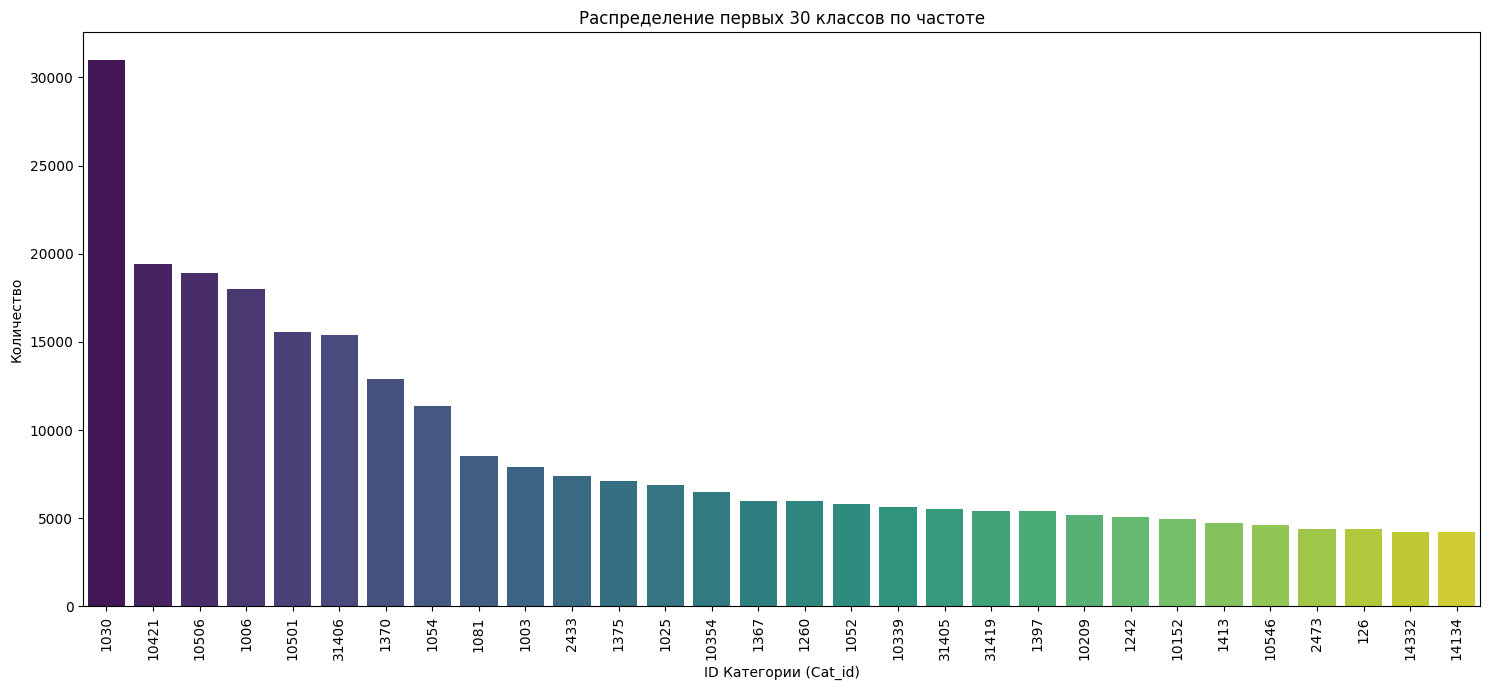

In [68]:
# --- 4. Визуализация дисбаланса ---
# Так как у нас 776 классов, полная гистограмма будет нечитаемой.
# Лучше посмотреть на распределение N самых частых или использовать логарифмическую шкалу.

plt.figure(figsize=(15, 7)) 

# Показать N самых частых классов
num_classes_to_show = 30 # Сколько классов показать на графике
top_classes = class_counts.head(num_classes_to_show)

sns.barplot(x=top_classes.index, y=top_classes.values, palette='viridis', order=top_classes.index)
plt.title(f'Распределение первых {num_classes_to_show} классов по частоте')
plt.xlabel('ID Категории (Сat_id)')
plt.ylabel('Количество')
plt.xticks(rotation=90) # Повернуть метки, если их много
plt.tight_layout() # Чтобы метки не перекрывались
plt.show()

У нас серезная проблема по дисбалансу классов так как 50 процентов наших классов содержат менше 10 экземпляров внутри себя что делает невозможным исползование таких методов как оверсемплинг или андерсемплинг.

Пока что оставим все как есть

In [69]:
def visualize_top_categories(df, categories, top_n=5):

    plt.figure(figsize=(18, 6))

    for i, category in enumerate(categories):
        top_values = df[category].value_counts().nlargest(top_n)

        plt.subplot(1, len(categories), i + 1)
        top_values.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink'])  # Добавил цвета
        plt.title(f'Топ-{top_n} {category}')
        plt.xlabel(category)
        plt.ylabel('Количество')

    plt.tight_layout()
    plt.show()

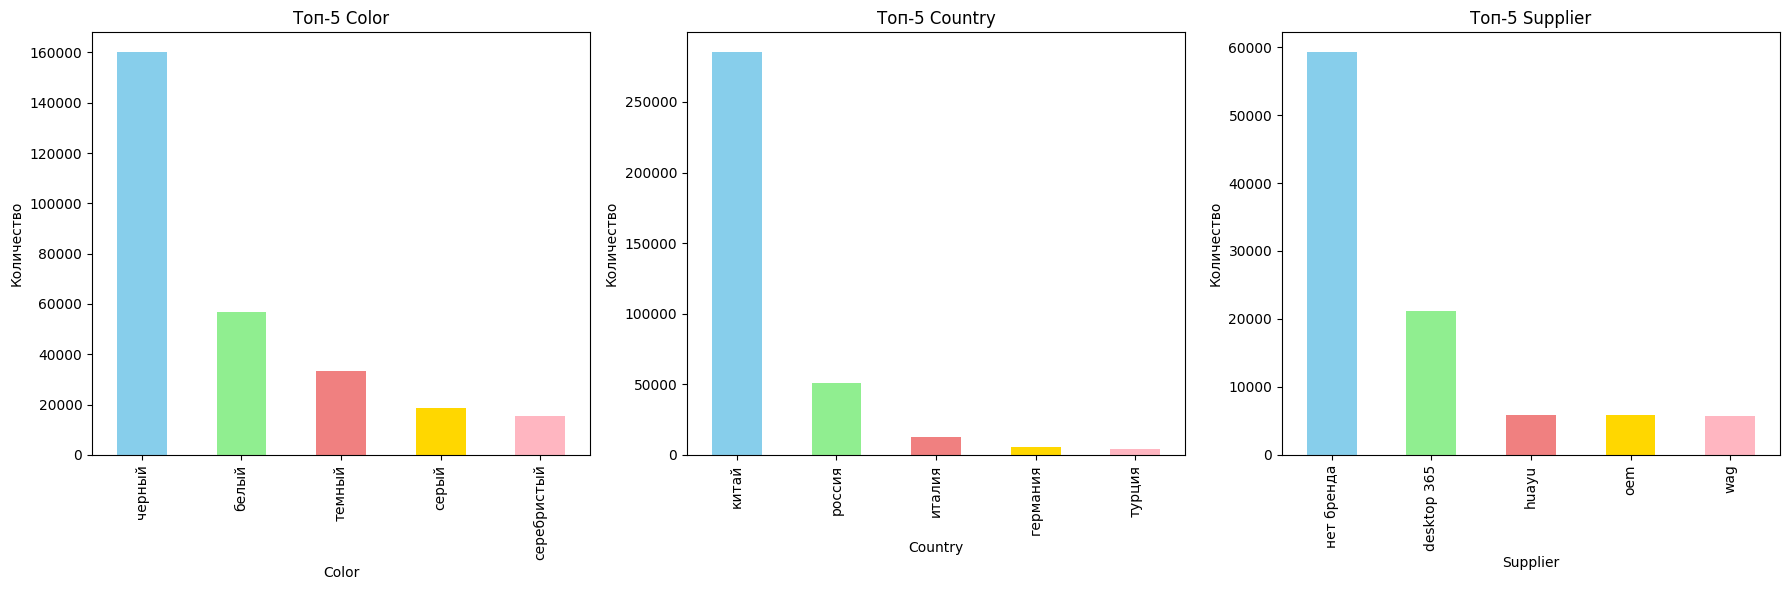

In [70]:
visualize_top_categories(df_lab4, ['Color', 'Country', 'Supplier'])

    Топ-5 цветов:

Черный цвет явно доминирует, имея наибольшее количество записей среди всех цветов.
Белый и темный цвета находятся на втором и третьем местах соответственно, но значительно отстают от черного.
Серый и серебристый цвета имеют значительно меньшее количество записей, что говорит о их меньшей популярности или распространенности в данном наборе данных.

    Топ-5 стран:

Китай лидирует с большим отрывом, что указывает на то, что большинство товаров в нашем наборе данных произведено в Китае.
Россия занимает второе место, но количество записей значительно ниже, чем у Китая.
Италия, Германия и Турция имеют относительно небольшое количество записей, что говорит о их меньшей доле в общем объеме товаров.

    Топ-5 поставщиков:

Нет бренда является самым распространенным поставщиком, что может указывать на большое количество товаров, продаваемых без указания бренда.
desktop 365 и huayu находятся на втором и третьем местах соответственно, но значительно отстают от "нет бренда".
osm и waq имеют относительно небольшое количество записей, что говорит о их меньшей доле среди поставщиков.

    Общие выводы:

1. Черный цвет является наиболее популярным среди товаров в данном наборе данных.

2. Большинство товаров произведено в Китае.

3. Значительная часть товаров продается без указания бренда.

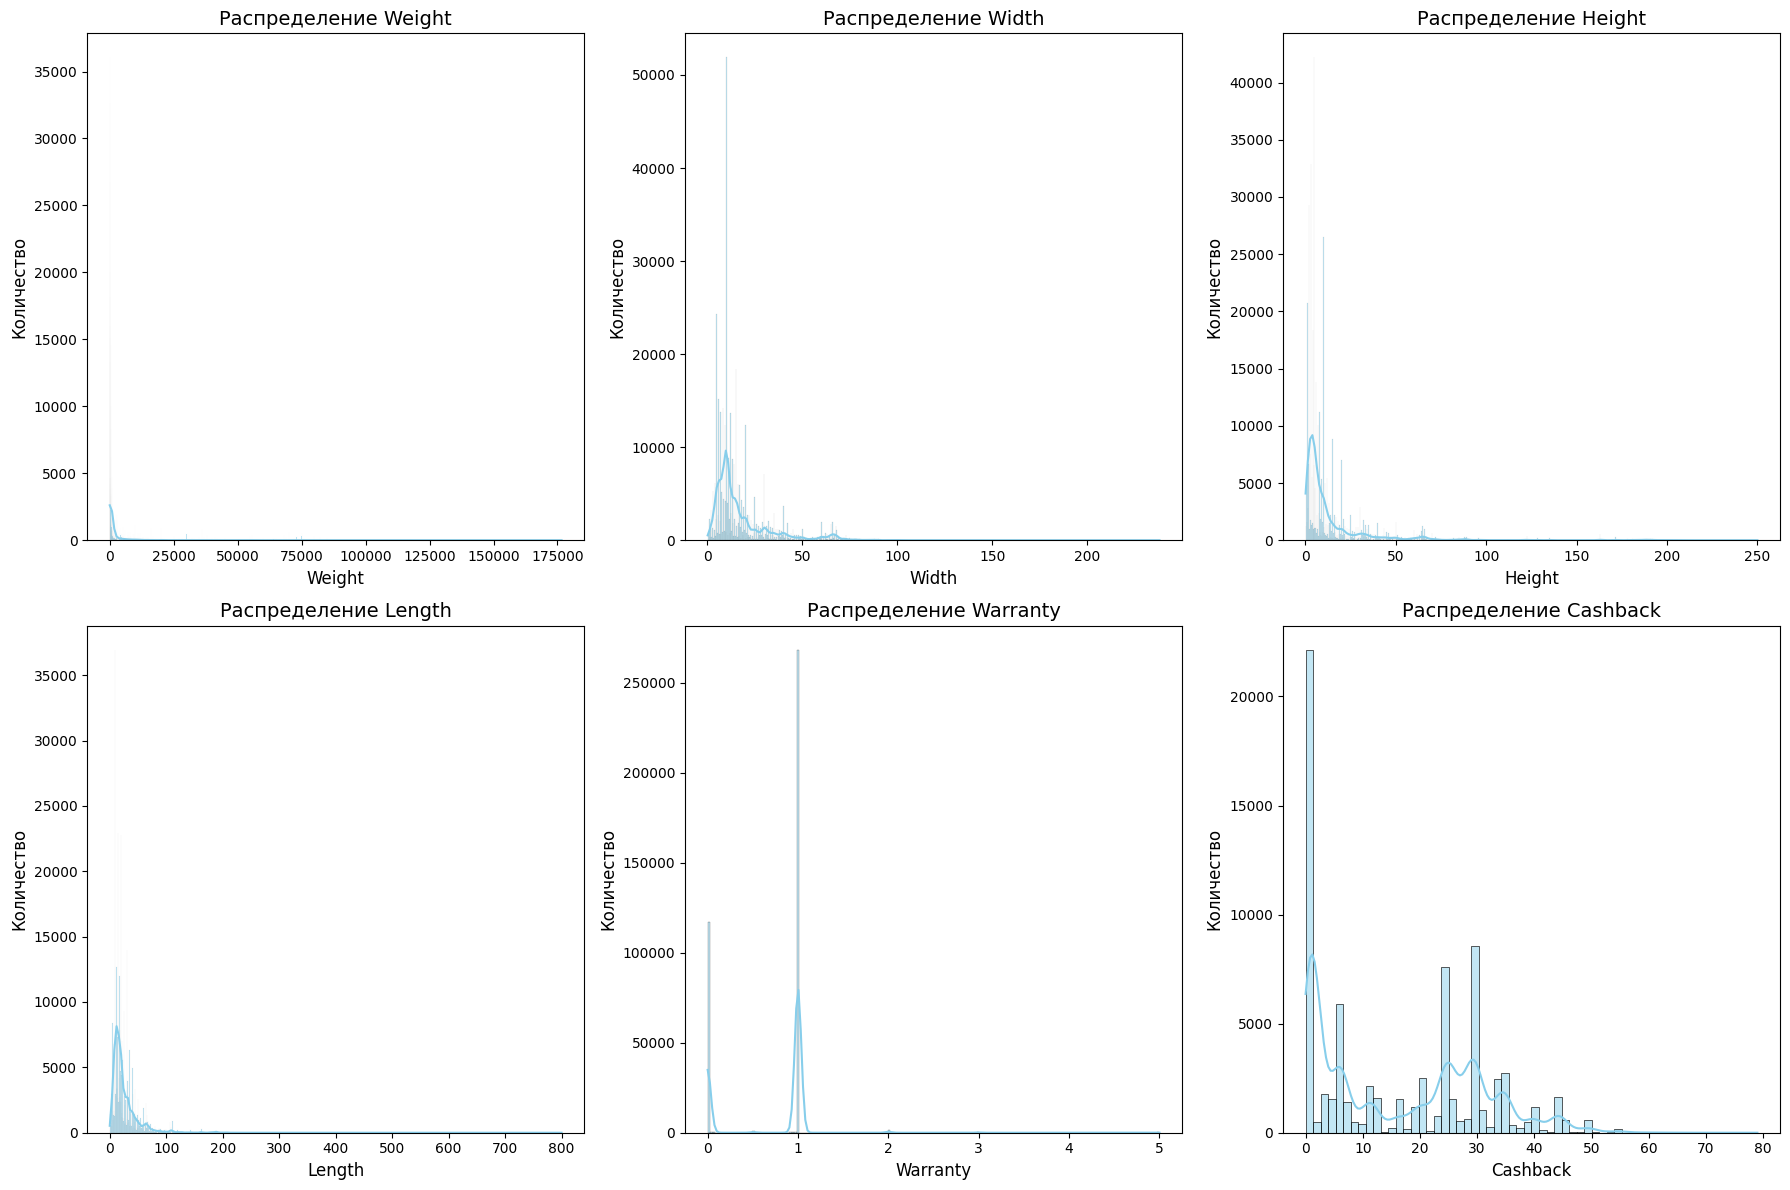

In [71]:
features = ['Weight', 'Width', 'Height', 'Length', 'Warranty', 'Cashback']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    if pd.api.types.is_numeric_dtype(df_lab4[feature]):
        sns.histplot(df_lab4[feature], kde=True, color='skyblue', edgecolor='black')
    else:
        sns.countplot(x=feature, data=df_lab4, palette='viridis')
        plt.xticks(rotation=45, ha='right')  # Поворачиваем метки для читаемости
    plt.title(f'Распределение {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Количество', fontsize=12)

plt.tight_layout()
plt.show()

In [72]:
df_lab4.describe() #

,Cat_id,Pickup,Delivery,Warranty,Weight,Width,Height,Length,Cashback
count,447490.000000,390525.000000,390525.000000,390565.000000,388753.000000,388402.000000,388402.000000,388402.000000,75315.000000
mean,7729.193935,0.993355,0.368458,0.706210,3423.028982,17.526833,13.639108,25.435863,16.303910
std,8736.945965,0.081245,0.482387,0.480201,11596.665899,16.106582,22.773356,23.983135,14.203984
min,1.000000,0.000000,0.000000,0.000000,0.010000,0.100000,0.100000,0.100000,0.000000
25%,1116.000000,1.000000,0.000000,0.000000,80.000000,8.000000,3.000000,11.000000,1.000000
50%,3180.000000,1.000000,0.000000,1.000000,209.000000,11.500000,6.000000,18.000000,12.000000
75%,10506.000000,1.000000,1.000000,1.000000,805.000000,20.000000,13.000000,30.100000,29.000000
max,31435.000000,1.000000,1.000000,5.000000,176600.000000,238.000000,250.000000,800.000000,79.000000


In [73]:
df_lab4[df_lab4['Length'] >= 700].head()

,Name,Cat_id,Supplier,Pickup,Delivery,Warranty,Country,Weight,Width,Height,Length,Color,Cashback,Model
54727,"комплект для откатных ворот алютех (alutech) с неоцинкованной шиной sg01 (8 м) и стальными роликами до 450 кг., проем до 5,7 м.",30951,alutech,1.0,0.0,1.0,беларусь,54300.0,20.0,27.0,800.0,сталь,NaN,SG01_8 м / стальные опоры роликовые
292064,"комплект для откатных ворот алютех (alutech) с неоцинкованной шиной sg01 (7 м) и стальными роликами до 450 кг., проем до 5 м.",30951,alutech,1.0,0.0,1.0,беларусь,49000.0,20.0,27.0,700.0,сталь,NaN,SG01
519544,"комплект для откатных ворот алютех с шиной 7 м., автоматика ni600z, зубчатая рейка 6 п.м. (вес до 450 кг., проем до 5 м.)",30951,alutech,1.0,1.0,0.0,беларусь,69600.0,45.0,43.0,700.0,сталь,NaN,Alutech+HG


# Подготовка данных для моделирования.
    

# #1

Для обеспечения максимальной чистоты данных будет произведено удаление столбцов 'Name', 'Model' и 'Cashback' из текущего набора данных. Впоследствии будет предпринята повторная процедура дедупликации для устранения возможных дублирующихся записей.

In [74]:
df_lab5 = df_lab4.drop(['Name', 'Model', 'Cashback'], axis=1).drop_duplicates()
df_lab5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214585 entries, 0 to 716548
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Cat_id    214585 non-null  int64  
 1   Supplier  214075 non-null  object 
 2   Pickup    203846 non-null  float64
 3   Delivery  203846 non-null  float64
 4   Warranty  203841 non-null  float64
 5   Country   201451 non-null  object 
 6   Weight    203359 non-null  float64
 7   Width     203183 non-null  float64
 8   Height    203183 non-null  float64
 9   Length    203183 non-null  float64
 10  Color     182526 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 19.6+ MB


Проверим сново на дисбаланс наших классов

In [75]:
target_column = 'Cat_id'
class_counts = df_lab5[target_column].value_counts()

In [76]:
print(class_counts.describe()) 

max_count = class_counts.max()
min_count = class_counts.min()
if min_count > 0: 
    imbalance_ratio = max_count / min_count
    print(f"\nСоотношение самого частого к самому редкому классу: {imbalance_ratio:.2f}")
    if imbalance_ratio > 100:
        print("Обнаружен сильный дисбаланс классов!")
    elif imbalance_ratio > 10:
         print("Обнаружен заметный дисбаланс классов.")
    else:
         print("Дисбаланс классов умеренный или отсутствует.")
else:
    print("\nНе удалось рассчитать соотношение (есть классы с 0 экземплярами или только 1 класс).")


count      776.000000
mean       276.527062
std        956.626462
min          1.000000
25%          1.000000
50%          7.500000
75%        160.250000
max      10697.000000
Name: count, dtype: float64

Соотношение самого частого к самому редкому классу: 10697.00
Обнаружен сильный дисбаланс классов!


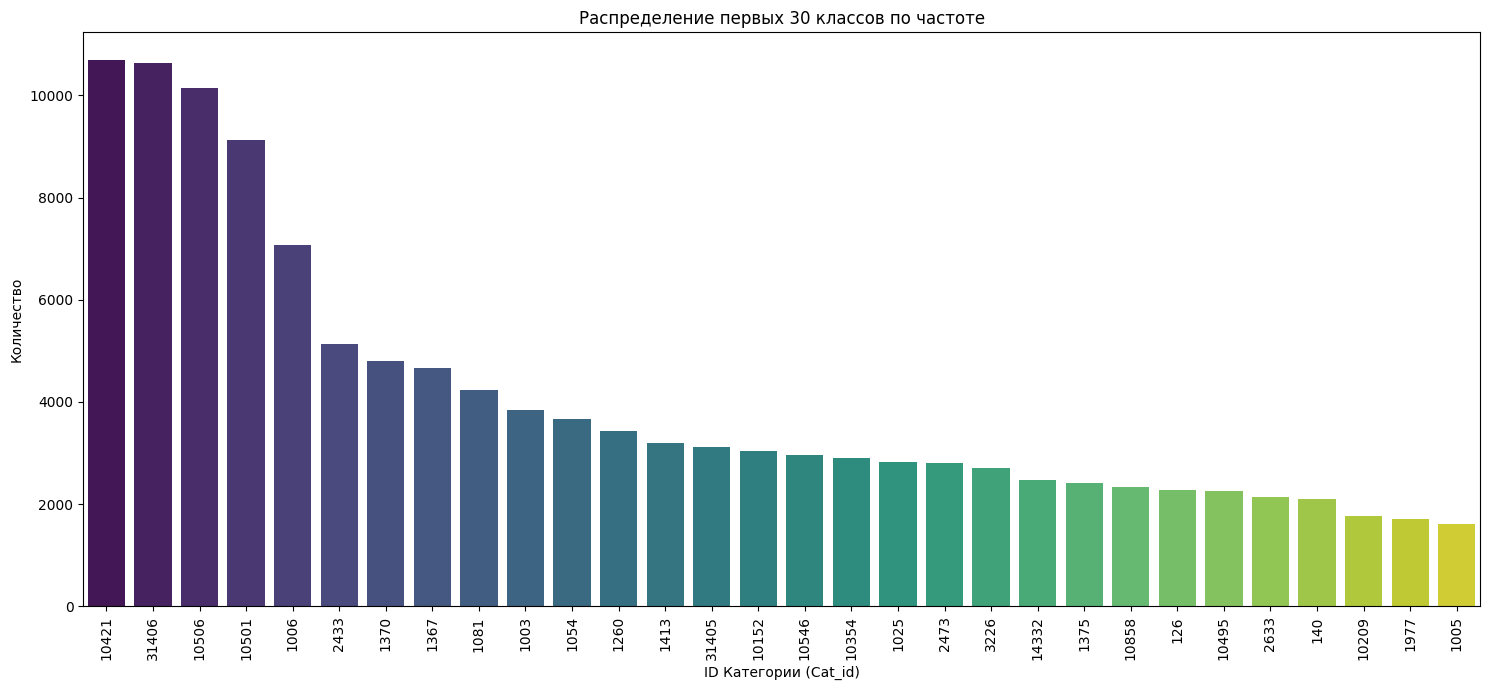

In [77]:
plt.figure(figsize=(15, 7)) 

num_classes_to_show = 30
top_classes = class_counts.head(num_classes_to_show)

sns.barplot(x=top_classes.index, y=top_classes.values, palette='viridis', order=top_classes.index)
plt.title(f'Распределение первых {num_classes_to_show} классов по частоте')
plt.xlabel('ID Категории (Сat_id)')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.tight_layout() # Чтобы метки не перекрывались
plt.show()

Анализ распределения классов выявил существенный дисбаланс. С целью построения более устойчивой модели машинного обучения, ограничим обучающую выборку на 30 наиболее часто встречающимися классами. И также удалим все строки, содержащие нулевые значения



# #2

In [139]:
top_list = top_classes.reset_index()['Cat_id'].to_list()
df_lab6 = df_lab5[df_lab5['Cat_id'].isin(top_list)].dropna()

In [140]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    accuracy_score,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import category_encoders as ce

In [141]:
target = 'Cat_id'
categorical_features = ['Supplier', 'Country', 'Color']

# 1 Числовые признаки определим как все float64 и оставшиеся int64 (кроме цели)
numerical_features = df_lab6.select_dtypes(include=['float64', 'int64']).columns.tolist()
if target in numerical_features:
    numerical_features.remove(target) # Удаляем целевую переменную из списка признаков

print(f"\nЦелевая переменная: {target}")
print(f"Категориальные признаки: {categorical_features}")
print(f"Числовые признаки: {numerical_features}")


Целевая переменная: Cat_id
Категориальные признаки: ['Supplier', 'Country', 'Color']
Числовые признаки: ['Pickup', 'Delivery', 'Warranty', 'Weight', 'Width', 'Height', 'Length']


In [142]:
# 2 Кодирование целевой переменной
# Убедимся, что классы закодированы от 0 до N-1
label_encoder_y = LabelEncoder()
df_lab6[target] = label_encoder_y.fit_transform(df_lab6[target])
print(f"\nЦелевая переменная '{target}' закодирована LabelEncoder.")
print(f"Количество классов: {len(label_encoder_y.classes_)}")


Целевая переменная 'Cat_id' закодирована LabelEncoder.
Количество классов: 30


In [143]:
# 3 Разделение на обучающую и тестовую выборки
# Используем stratify=df_lab6[target] для сохранения пропорций классов в обеих выборках,
# что важно при дисбалансе классов.
X = df_lab6.drop(target, axis=1)
y = df_lab6[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% данных на тест
    random_state=42, # Для воспроизводимости
    stratify=y      # Учитываем дисбаланс классов при делении
)

print(f"\nДанные разделены на обучающую ({X_train.shape[0]} строк) и тестовую ({X_test.shape[0]} строк) выборки.")
print("Распределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True).head())
print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True).head())


Данные разделены на обучающую (84637 строк) и тестовую (21160 строк) выборки.
Распределение классов в обучающей выборке:
Cat_id
29    0.100216
21    0.090020
23    0.080130
24    0.073703
4     0.062266
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
Cat_id
29    0.100236
21    0.090028
23    0.080151
24    0.073724
4     0.062287
Name: proportion, dtype: float64


In [144]:
# 4 Target Encoding для категориальных признаков
# Используем TargetEncoder из библиотеки category_encoders.
# Он имеет встроенные механизмы сглаживания (smoothing) для предотвращения переобучения
# и обработки неизвестных категорий в тестовой выборке.
# Обучаем энкодер ТОЛЬКО на обучающих данных!
target_encoder = ce.TargetEncoder(cols=categorical_features, smoothing=5.0) # smoothing - параметр сглаживания

# Обучаем на X_train, y_train
X_train_encoded = target_encoder.fit_transform(X_train, y_train)

# Применяем обученный энкодер к X_test
X_test_encoded = target_encoder.transform(X_test)

print("\nКатегориальные признаки закодированы с помощью Target Encoding.")
print("Пример закодированных данных (обучающая выборка):")
print(X_train_encoded[categorical_features].head())


Категориальные признаки закодированы с помощью Target Encoding.
Пример закодированных данных (обучающая выборка):
         Supplier    Country      Color
510774  15.673967  15.504067  18.489827
252351  25.000000  22.528911  18.489827
311938  12.979079  15.504067  14.034973
320555  12.979079  15.504067  14.034973
577320  15.570535  15.504067  18.489827


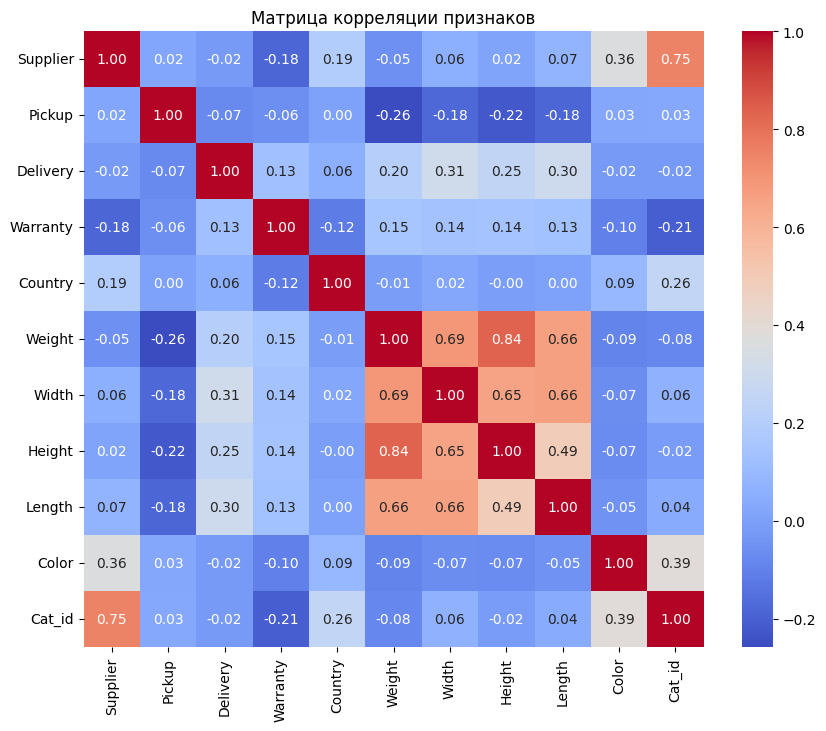

In [145]:
correlation_matrix = pd.concat([X_train_encoded, y_train], axis=1).corr()

# Визуализируем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции признаков')
plt.show()

Анализ корреляций показывает, что признак 'Pickup' не имеет значимой связи ни с другими признаками, ни с целевой переменной, что свидетельствует о его потенциальной бесполезности для модели.

In [146]:
X_test_encoded = X_test_encoded.drop('Pickup', axis=1)
X_train_encoded = X_train_encoded.drop('Pickup', axis=1)

# Построение модели.

# #1 модель "Random Forest"

In [147]:
# ---1
# Используем class_weight='balanced' для автоматической корректировки весов
# классов в соответствии с их частотой, чтобы бороться с дисбалансом.
rf_model = RandomForestClassifier(
    n_estimators=200,       # Количество деревьев 
    random_state=42,        # Для воспроизводимости
    class_weight='balanced',# Учитываем дисбаланс классов
    n_jobs=-1,              # Использовать все доступные ядра процессора
    max_depth=25,           # Ограничение глубины деревьев 
    min_samples_split=5,    # Мин. кол-во объектов для разделения узла 
    min_samples_leaf=3      # Мин. кол-во объектов в листе 
)

print("\nНачинаем обучение модели Random Forest...")
# Обучаем модель на закодированных обучающих данных
rf_model.fit(X_train_encoded, y_train)
print("Модель обучена.")


Начинаем обучение модели Random Forest...
Модель обучена.


In [148]:
# --- 2. Предсказание на тестовой выборке ---
y_pred = rf_model.predict(X_test_encoded)
print("\nПредсказания сделаны на тестовой выборке.")


Предсказания сделаны на тестовой выборке.


In [149]:
# --- 3. Оценка качества модели ---
print("\n--- Оценка качества модели ---")

# Accuracy (для сравнения)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Weighted F1-score (основная метрика при дисбалансе)
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1-score: {weighted_f1:.4f}")

# Macro F1-score (оценка без учета размера класса)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1-score: {macro_f1:.4f}")


--- Оценка качества модели ---
Accuracy: 0.7714
Weighted F1-score: 0.7725
Macro F1-score: 0.7522



Важность признаков:
          importance
Supplier    0.295337
Weight      0.155959
Length      0.123306
Width       0.117747
Height      0.115532
Color       0.097544
Country     0.050930
Warranty    0.022601
Delivery    0.021045


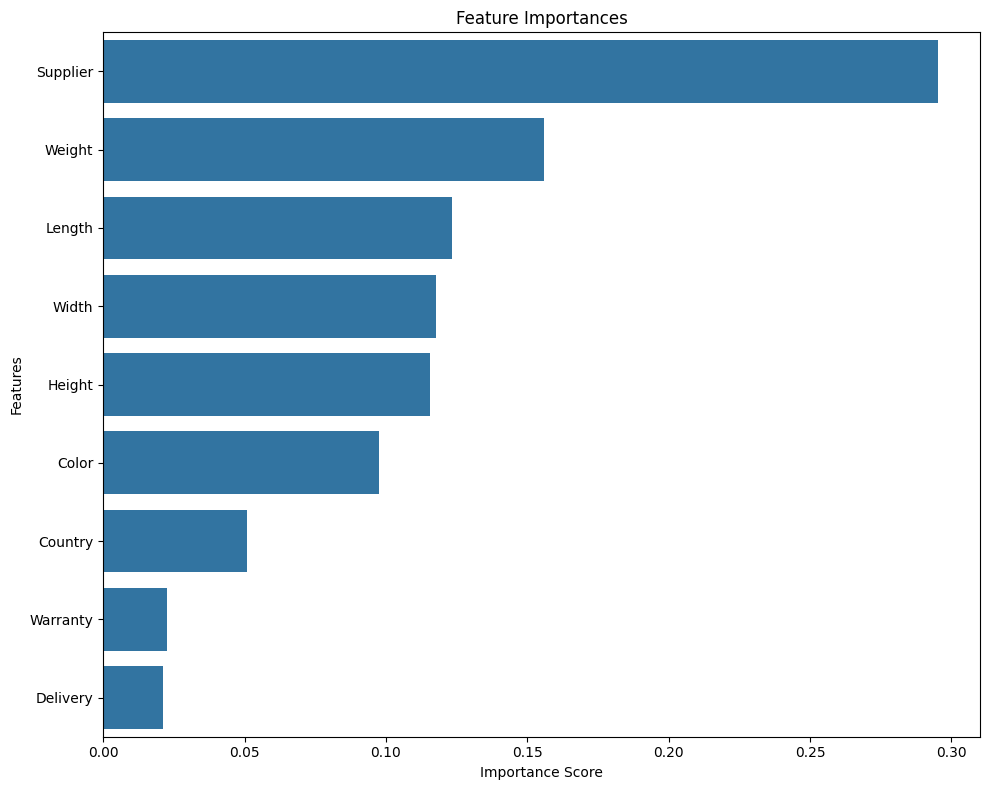

In [150]:
# Важность признаков 
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                index = X_train_encoded.columns,
                                columns=['importance']).sort_values('importance', ascending=False)
print("\nВажность признаков:")
print(feature_importances.head(15))

# Визуализация важности признаков
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.importance.head(15), y=feature_importances.index[:15])
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# #2 модель "XGBoost"

In [151]:
import xgboost as xgb
from sklearn.utils import class_weight

In [152]:

# Расчет весов классов для учета дисбаланса
class_weights = class_weight.compute_sample_weight('balanced', y_train)

# ---1. Создание модели XGBoost Classifier
xg_model = xgb.XGBClassifier(
    objective='multi:softmax',  # Для многоклассовой классификации
    num_class=len(y.unique()),  # Количество классов
    n_estimators=200,  # Максимальное количество итераций
    n_jobs=-1,  # Использовать все доступные ядра
    random_state=42
)
print("\nНачинаем обучение модели XGBoost...")

# Обучаем модель на закодированных обучающих данных и с учетом весов классов
xg_model.fit(X_train_encoded, y_train, sample_weight=class_weights)
print("Модель обучена.")


Начинаем обучение модели XGBoost...
Модель обучена.


In [153]:
# --- 2. Прогнозирование на тестовом наборе
y_pred_xg = xg_model.predict(X_test_encoded)

In [154]:
# --- 3. Оценка качества модели ---
print("\n--- Оценка качества модели ---")

# Accuracy (для сравнения)
accuracy = accuracy_score(y_test, y_pred_xg)
print(f"Accuracy: {accuracy:.4f}")

# Weighted F1-score (основная метрика при дисбалансе)
weighted_f1 = f1_score(y_test, y_pred_xg, average='weighted')
print(f"Weighted F1-score: {weighted_f1:.4f}")

# Macro F1-score (оценка без учета размера класса)
macro_f1 = f1_score(y_test, y_pred_xg, average='macro')
print(f"Macro F1-score: {macro_f1:.4f}")


--- Оценка качества модели ---
Accuracy: 0.8197
Weighted F1-score: 0.8208
Macro F1-score: 0.8064



Важность признаков:
          importance
Supplier    0.205533
Delivery    0.138259
Country     0.135572
Weight      0.129853
Color       0.125593
Warranty    0.083584
Length      0.061237
Width       0.061112
Height      0.059256


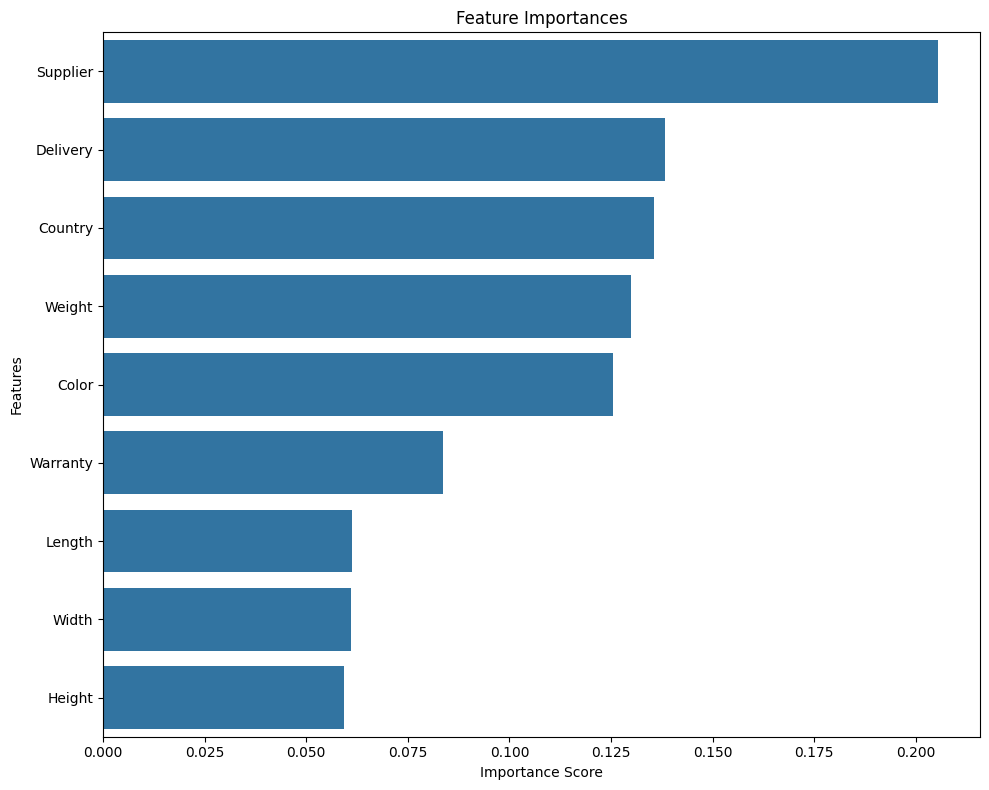

In [155]:
# Важность признаков 
feature_importances = pd.DataFrame(xg_model.feature_importances_,
                                index = X_train_encoded.columns,
                                columns=['importance']).sort_values('importance', ascending=False)
print("\nВажность признаков:")
print(feature_importances.head(15))

# Визуализация важности признаков
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.importance.head(15), y=feature_importances.index[:15])
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# #3 модель KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [157]:
# Обработка дисбаланса классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)



In [158]:
# Создание и обучение модели k-NN
knn_model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1) 
print("\nНачинаем обучение модели k-NN...")

knn_model.fit(X_train_resampled, y_train_resampled)
print("Модель обучена.")


Начинаем обучение модели k-NN...
Модель обучена.


In [159]:
# Прогнозирование на тестовой выборке
y_pred_knn = knn_model.predict(X_test_encoded)

In [160]:
# --- 3. Оценка качества модели ---
print("\n--- Оценка качества модели ---")

# Accuracy (для сравнения)
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.4f}")

# Weighted F1-score (основная метрика при дисбалансе)
weighted_f1 = f1_score(y_test, y_pred_knn, average='weighted')
print(f"Weighted F1-score: {weighted_f1:.4f}")

# Macro F1-score (оценка без учета размера класса)
macro_f1 = f1_score(y_test, y_pred_knn, average='macro')
print(f"Macro F1-score: {macro_f1:.4f}")


--- Оценка качества модели ---
Accuracy: 0.5740
Weighted F1-score: 0.5782
Macro F1-score: 0.5417


Общий анализ:

    RandomForest:
Показывает достаточно хорошие результаты с точностью около 77%.

Взвешенная F1-мера немного выше, что указывает на способность модели справляться с несбалансированными классами.

Макро-F1-мера немного ниже, что говорит о возможных трудностях с классами, представленными меньшим количеством данных.

    XGBoost:
Демонстрирует лучшие результаты среди трех моделей с точностью около 82%.

Также показывает хорошие значения взвешенной и макро-F1-меры, что свидетельствует о стабильной работе модели.

    k-NN:
Показывает самые низкие результаты с точностью около 58%.

Значения F1-меры также низкие, что указывает на недостаточную эффективность модели на данном наборе данных.

# Заключение:

Модель XGBoost показала наилучшие результаты, что делает ее наиболее предпочтительной для данного набора данных.                                                                   
Модель RandomForest также демонстрирует приемлемые результаты, но немного уступает XGBoost.                                                                                        
Модель k-NN показывает наихудший результат из трех, и вероятно не подходит для этих данных без дополнительной настройки гиперпараметров или предварительной обработки.             
Из этого анализа можно сделать вывод, что ансамблевые методы, такие как XGBoost и RandomForest, лучше справляются с задачей классификации на данном наборе данных, чем метод    k-ближайших соседей.